In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
date_rng = pd.date_range(start='2000-01-01', periods=240, freq='M')  # 20 years of monthly data
np.random.seed(42)

<ipython-input-16-63259840c64b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2000-01-01', periods=240, freq='M')  # 20 years of monthly data


In [ ]:
trend = np.linspace(10, 50, 240)  # Linear trend
seasonality = 10 * np.sin(np.linspace(0, 24 * np.pi, 240))  # Seasonal pattern
noise = np.random.normal(scale=5, size=240)  # Random noise
data = trend + seasonality + noise  # Combining components


In [ ]:
df = pd.DataFrame({'Date': date_rng, 'Value': data})

In [ ]:
df['Months'] = np.arange(len(df))

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
X_train, y_train = train[['Months']], train['Value']
X_test, y_test = test[['Months']], test['Value']

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
train['Prediction'] = model.predict(X_train)
test['Prediction'] = model.predict(X_test)

<ipython-input-23-7791bb4fd511>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Prediction'] = model.predict(X_train)
<ipython-input-23-7791bb4fd511>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = model.predict(X_test)


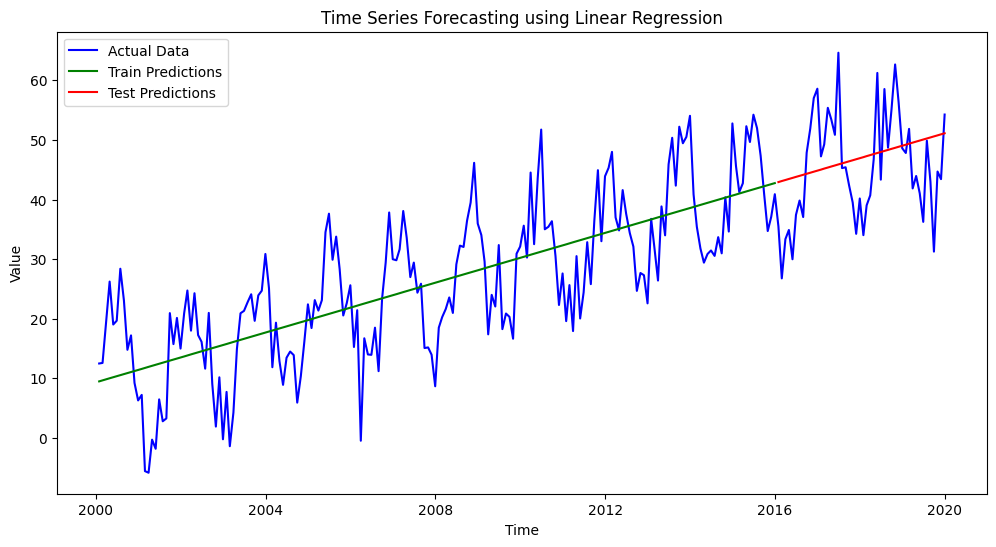

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], label="Actual Data", color='blue')
plt.plot(train['Date'], train['Prediction'], label="Train Predictions", color='green')
plt.plot(test['Date'], test['Prediction'], label="Test Predictions", color='red')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time Series Forecasting using Linear Regression")
plt.legend()
plt.show()

In [ ]:
file_name = 'TimeSeries_Regression.csv'
df.to_csv(file_name, index=False)
print(f"✅ Dataset saved as '{file_name}'")

✅ Dataset saved as 'TimeSeries_Regression.csv'
